In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import pylab as P

In [2]:
# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


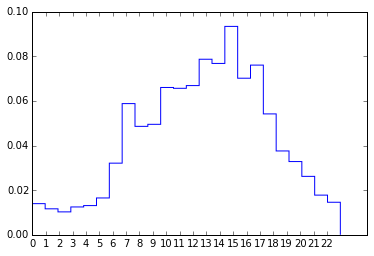

In [6]:
# Plot departure time from daysim outputs
myh5 = h5py.File(r'R:\SoundCast\releases\soundcast_release_c1\outputs\daysim_outputs.h5')

trip = myh5['Trip']

deptime = pd.DataFrame(trip['deptm'][:])
deptimehr = (deptime/60).astype(int)

bins = 24
P.hist(deptimehr[0], bins=bins, normed=True, histtype='step', color='b', label='blah')
P.xticks(range(23))
P.show()

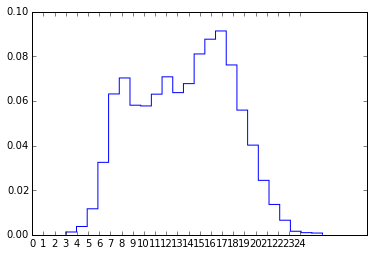

In [7]:
# Plot departure time from 2014 survey
myh5 = h5py.File('J:/Projects/Surveys/HHTravel/Survey2014/Data/DaySim/survey14.h5')

trip = myh5['Trip']

deptime = pd.DataFrame(trip['deptm'][:])
deptimehr = (deptime/60).astype(int)

bins = 24
P.hist(deptimehr['deptm'], bins=bins, normed=True, histtype='step', color='b', label='blah')
P.xticks(range(25))
P.show()

In [8]:
pd.DataFrame(trip['travdist'][:]).describe()

,travdist
count,54617
mean,5
std,0
min,5
25%,5
50%,5
75%,5
max,5


Fill travdist, travcost, and travtime with non-negative values

In [23]:
myh5 = h5py.File(r'R:\SoundCast\releases\TransportationFutures2010\scripts\summarize\survey14.h5')
trip = myh5['Trip']

for table in ['travcost','travtime','travdist']:
    # Original file has -1 as filler for these fields, replace with +1
    trip[table][:]=np.ones(len(trip[table][:]))

In [152]:
# Replace negative expansion factors (for person rows) with +1

counter=0
for record in person['psexpfac']:
    if person['psexpfac'][counter][0] < 0:
        person['psexpfac'][counter] = np.array(1)    # replace with 1 for now
        print person['psexpfac'][counter][0]
        print counter
    counter +=1

In [188]:
# Replace all negative values from -1 to 1 on distance to work
person = myh5['Person']

for field in ['psaudist','pwaudist']:
    counter=0
    for record in person[field]:
        if person[field][counter][0] < 0:
            # replace with 1 must be float, can probably get a float 1 otherwise
            # but this worked first
#             person[field][counter][0] = np.ones(1)[0]    
            person[field][counter][0] = 1.0
            #print type(person[field][counter][0])
    counter +=1